In [13]:
using LinearAlgebra
using Plots

In [14]:
function generate_subspaces(n)
    E,=qr(randn(n,n))
    k = div(n, 2)
    E1=E[:,1:k]
    E2=E[:,k+1:end]
    F,=qr(randn(n-1,n-1))
    F1=F[:,1:k]
    F2=F[:,k+1:end]
    return E,F,E1,E2,F1,F2
end

generate_subspaces (generic function with 1 method)

In [15]:
function cs_decomposition(n,E,F,E1,E2,F1,F2)
    F1 = vcat(F1, zeros(1, size(F1, 2)))
    F2 = vcat(F2, zeros(1, size(F2, 2)))
    F2 = hcat(F2, zeros(size(F2, 1), 1))
    U1,S11,V1=svd(E1'*F1,full=true)
    temp,S12,V2=svd(E1'*F2,full=true)
    U2,S22,V2=svd(E2'*F2,full=true)
    D=[U1'*E1'*F1*V1 U1'*E1'*F2*V2
    U2'*E2'*F1*V1 U2'*E2'*F2*V2]
    U=[U1 zeros(2,n-2)
    zeros(n-2,2) U2]
    W=E*U*D*U'*E'
    return W, U, U1, U2, V1, V2, D
end

cs_decomposition (generic function with 1 method)

In [16]:
function draw(M, n)
    x = M[:, 1]
    y = M[:, 2]
    z = x + im * y
    e = z .^ 2
    E = [real(e)' ; imag(e)']
    
    points = zeros(2, n + 1)
    for i in 1:n
        points[:, i + 1] = sum(E[:, 1:i], dims=2)
    end
    
    return points
end

draw (generic function with 1 method)

In [17]:
n=4
E,F,E1,E2,F1,F2=generate_subspaces(n)

(LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([-2.0459302960808037 0.06723325342026931 -0.2421721134321025 3.0263748725954236; 0.1710577197997311 1.7394545660089575 -0.4078507622646381 -2.1362376733741386; 0.35093070281502353 0.001994424445487157 1.8379928557885756 0.6688767342909283; -0.19495838238782615 -0.7119762852833004 -0.7734476194130245 0.1757890990627483], [1.680076656962682 -0.6925016229384717 -0.5758952273795824 0.0; 1.5e-323 1.3272155698530443 -0.9179120697947467 0.0; 8.212602828943e-312 8.212602829575e-312 1.2513912185638734 0.0; 8.21260282926e-312 8.21260282989e-312 8.212602830208e-312 0.0]), LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([-0.8937845460897077 -0.23518301227117042 -0.45123738915796574; -0.08260175260592098 0.46457950063415515 -1.6072374411566295; 0.004414071616897428 0.7032424577937044 1.030260807978875], [1.9864079370234733 0.2113206632493135 0.0; 6.95248233632216e-310 1.3381954842348496 0.0; 6.9524823363221

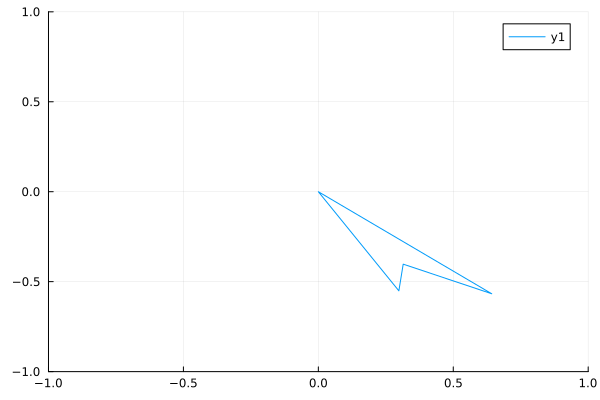

In [18]:
points=draw(E1,n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

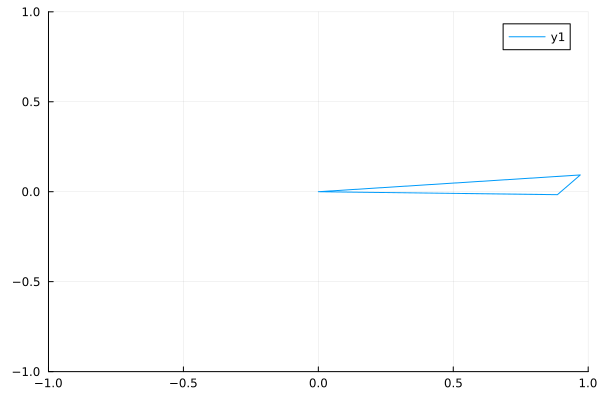

In [19]:
points=draw(F1,n-1)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

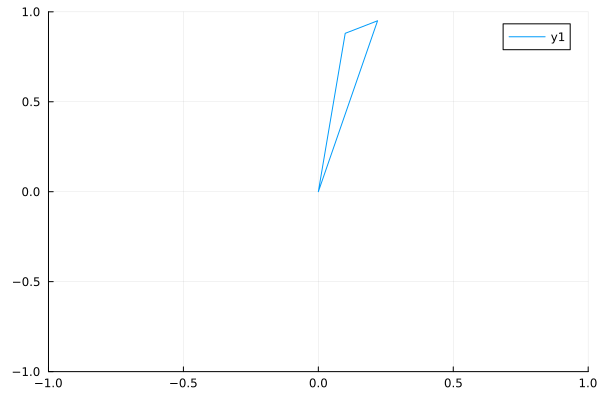

In [20]:
W, U, U1, U2, V1, V2, D=cs_decomposition(n,E,F,E1,E2,F1,F2)
points=draw(W*E1*U1, n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])